# Motion of Astronomical Bodies

## Orbital Periods

Copernicus determined the scale of the Solar System from observations, in particular using the *synodic period* $S$ and sidereal period $P$.  He didn't actually know the distance from the Earth to the Sun, so he (and others) let the Earth-Sun distance equal to $1$ (unity).
    - [**Astronomical unit**](https://en.wikipedia.org/wiki/Astronomical_unit) (AU): the distance from the Earth to the Sun
    - During Copernicus' time, the AU represented the actual distance; Later, it was redefined to be the *average* distance.  Today it's defined as fundamental constants (i.e., the speed of light).

The sidereal period $P$ of a planet can be determined by comparing the planet's synodic period $S$ to the Earth's sidereal period $E = 365.25\ {\rm days} = 1\ {\rm yr}$.  However this comparison differs depending on whether the planet (in question) is on a superior or inferior orbit compared to the Earth.  The relations are given as

\begin{align*}
\frac{1}{P} &= 
    \begin{cases} 
        \frac{1}{E} + \frac{1}{S}, \quad \text{(inferior)} \\
        \frac{1}{E} - \frac{1}{S}. \quad \text{(superior)}
    \end{cases}
\end{align*}

For Saturn (a superior orbit planet), the time that passes between oppositions (or the time between maximum brightness) is $378.1\ {\rm days} = 1.035\ {\rm yr}$.  Then we can calculate Saturn's sidereal period as

\begin{align*}
\frac{1}{P} &= \frac{1}{1\ {\rm yr}} - \frac{1}{1.035\ {\rm yr}} = 0.03399\ {\rm yr^{-1}}, \\
P &= \frac{1}{0.03399\ {\rm yr^{-1}}} = 29.42\ {\rm yr}.
\end{align*}

In [2]:
E = 365.25 #Earth's sidereal period (in days)
S = 378.1 #Saturn's synodic period (in days)

P_inv = 1- (E/S) #1/P (Saturn's siderial period)
P = 1/P_inv 

print("Saturn's sidereal period is %2.1f yr." % P)

Saturn's sidereal period is 29.4 yr.



**Saturn's sidereal period is 29.4 years**, which means that Saturn takes 29.4 years to return to the same spot while orbiting the Sun.

In Copernicus' model, the planetary orbits were perfect circles.  

- He needed to measure the time $t_O$ when a planet was at opposition (for outer planets) or inferior conjunction (for inner planets).
- The time $t$ when the same planet was at quadrature (for outer planets) or elongation (for inner planets).  

The difference in these times ($T = |t-t_O|$) would tell Copernicus what fraction of an orbit the planet had moved.  This would provide an estimate for the heliocentric longitude $\lambda$ of the planet at quadrature or elongation.  See [here](https://astro.unl.edu/naap/ssm/ssm_advanced.html) for more details.

$$ \lambda = \left(\frac{T}{S}\right) \times 360^\circ. $$

Recall that the special points (quadrature or elongation) form right triangles, where one angle is $90^\circ$ and another angle will be the heliocentric longitude $\lambda$.  In both cases, one side of the triangle will be the Earth-Sun distance (i.e., 1 AU).  Copernicus only need to use trigonometry to find the side corresponding to the planet-Sun distance $d_p$.  The following relations describe the trigonometry required for a planet on an inferior or superior orbit:

\begin{align*}
d_p &= \begin{cases}
    \cos{\lambda}, \quad \text{(inferior)} \\
    \frac{1}{\cos{\lambda}}. \quad \text{(superior)}
    \end{cases}
\end{align*}

For Saturn, it takes ~88 days (0.241 yr) for Saturn to move from opposition to next quadrature because Earth is moving along its orbit too.  Using this estimate, we have 

$$\lambda_{\rm Sat} = \left(\frac{0.241\ {\rm yr}}{1.035\ {\rm yr}}\right) \times 360^\circ = 83.8^\circ.$$

The Saturn-Sun distance is then 

$$d_{\rm Sat} = \frac{1\ {\rm AU}}{\cos{(83.8^\circ)}} = 9.3\ {\rm AU}.$$

**Not too far from the modern value, $9.58\ {\rm AU}$.**

In [16]:
import numpy as np

S = 1.035 #Saturn's synodic period (in yr)

T = 0.241 # Time between Saturn's opposition and next quadrature (in yr)
lamb = (T/S)*360. #heliocentric longitude (in degrees)

print("Saturn's heliocentric longitude at quadrature is %2.1f deg." % lamb)

d_sat = 1/np.cos(np.radians(lamb))
print("The Saturn-Sun distance is %1.1f AU." % d_sat)


Saturn's heliocentric longitude at quadrature is 83.8 deg.
The Saturn-Sun distance is 9.3 AU.


### Python code demonstration
Below is a python code that uses the n-body simulation software [rebound](https://rebound.readthedocs.io/en/latest/).  Earth (blue dot) and Saturn (red dot) begin at opposition, where the simulation is evolved forward by 89 days (cyan --> Earth; magenta --> Saturn).  The dashed-lines connect the Earth-Saturn-Sun configuration and illustrates that Saturn is near quadrature because Earth has move forward in its orbit. 

In [35]:
import rebound

def runSim(t):
    #run simulation forward by t days
    sim = rebound.Simulation()
    sim.integrator = 'whfast'
    sim.units = ('AU','days','Msun')
    sim.dt = 1

    sim.add(m=1) # add Sun
    sim.add(m=3.003e-6,a=1) #add Earth
    sim.add(m=2.867e-4,a=9.58) #add Saturn
    sim.move_to_hel()

    #sim.save_to_file("archive.bin", interval=10)
    sim.integrate(t)

    return sim

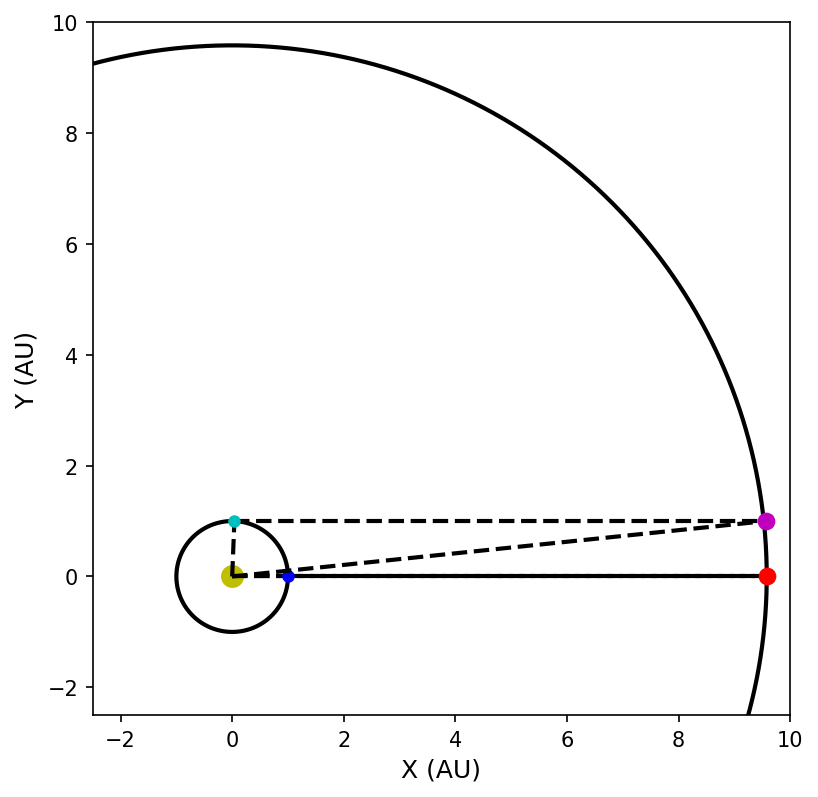

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_points(t):
    col_E, col_Sat = 'b','r'
    if t>0:
        col_E, col_Sat = 'c','m'
    sim = runSim(t)
    ps = sim.particles
    x_E, y_E  = ps[1].x,ps[1].y
    x_Sat,y_Sat = ps[2].x,ps[1].y
    ax.plot([0,x_E],[0,y_E],'k--',lw=2)
    ax.plot([0,x_Sat],[0,y_Sat],'k--',lw=2)
    ax.plot([x_E,x_Sat],[y_E,y_Sat],'k--',lw=2)
    ax.plot(x_E,y_E,'.',color=col_E,ms=10)
    ax.plot(x_Sat,y_Sat,'.',color=col_Sat,ms=15)

fs = 'large'
fig = plt.figure(figsize=(6,6),dpi=150)
ax = fig.add_subplot(111)

#draw orbits
df = 0.01
f_rng = np.arange(0,2*np.pi+df,df)
ax.plot(np.cos(f_rng),np.sin(f_rng),'k-',lw=2)
ax.plot(9.58*np.cos(f_rng),9.58*np.sin(f_rng),'k-',lw=2)

#plot points
ax.plot(0,0,'y.',ms=20)
plot_points(0)
plot_points(89)

ax.set_ylim(-2.5,10)
ax.set_xlim(-2.5,10)
ax.set_xlabel("X (AU)",fontsize=fs)
ax.set_ylabel("Y (AU)",fontsize=fs);

## Kepler's 3rd Law

Kepler's 3rd law relates the a planet's sideral (orbital) period $P$ squared to its semimajor axis (distance from the Sun) $a$ cubed.  By definition this limits the application of the Kepler's 3rd law (without Newton's contribution) to studies of planets orbiting Sun-like stars.  Mathematically, it can be given as

$$ P^2 = a^3.$$

**Note that the above formula assumes that the orbital period is given in years and the semimajor axis is in AU.**

The discovery of Neptune in 1846 required observations of only a small portion of its orbit.  That was enough to estimate its orbital period using Kepler's 2nd law and measuring Neptune's speed along its orbit.  See the video below for a recap.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/ckOch3OAyFM" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

Assuming that the orbital period of Neptune is 165 years.  How big is its orbit?  In other words, how large is its semimajor axis?

We can use Kepler's 3rd law directly to solve this problem.  By substitution, we can easily find that

$$ (165\ {\rm yr})^2 = a^3, $$

but we need to get the semimajor axis $a$ alone to answer the question.  One way to "undo" an exponent is to raise it to the inverse power.  To undo the square of a number, we simply raise the squared value to the $1/2$ power.  In our case, we can do the following:

\begin{align*}
(165\ {\rm yr})^2 &= a^3, \\
(165\ {\rm yr})^{2/3} &= a^{3/3}, \\
a &= 165^{2/3}\ {\rm AU}, \\
 &= 30.1\ {\rm AU}.
\end{align*}

**The semimajor axis of Neptune's orbit is 165 AU.**

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/MVpzU7j8TJk" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

In [51]:
P_Nep = 165
a_Nep = P_Nep**(2./3.)

print("The semimajor axis of Neptune is %2.1f AU." % a_Nep)

The semimajor axis of Neptune is 30.1 AU.


## Using Newton's Laws

Your acceleration can be measured by how your velocity changes over time.  This is given mathematically by

$$ \text{acceleration} = \frac{\text{How much velocity changes}}{\text{How long it takes to happen}}. $$

Suppose you are traveling at $60\ {\rm mph}$ (or ${\sim}27\ {\rm m/s}$) down the highway.  Then you increase your speed to $70\ {\rm mph}$ (or ${\sim}31\ {\rm m/s}$) over only 2 seconds.  Then your acceleration $a$ over that time is

$$ a = \frac{31\ {\rm m/s} - 27 {\rm m/s}}{2\ {\rm s}} = \frac{4}{2} = 2\ {\rm m/s^2}. $$

The acceleration due to gravity that you feel standing still is $a_g = 9.8\ {\rm m/s^2}$.  Your (horizontal) accleration was approximately $20\%$ that of Earth's gravity in that short burst.


Now that you are in outer space, without a speedometer.  To measure your acceleration, you have to be more clever.  A way to do this indirectly is to instead measure the net force and your resistance to motion.  This is applying Newton's 2nd law, where

$$ \text{acceleration} = \frac{\text{Force}}{\text{Mass}}. $$

You're a 100-kg astronaut (adrift in space) trying to get back to a nearby space shuttle.  With no tether to pull on, how can you get back to the ship?

You throw a 1-kg wrench directly away from the shuttle at a speed of $10\ {\rm m/s}$.  Newton's 3rd law says the wrench will apply a force back on you and because you threw the wrench *away* from the shuttle, the force will push you *towards* the shuttle.

Because you have more mass (inertia) than the wrench, that means your acceleration will be less than that of the wrench.  Also, we can assume that the time $t$ for things to happen are equal for both you and the wrench.  Then we have

$$ \text{your mass} \times \frac{\text{your speed}}{t} = \text{wrench's mass} \times \frac{\text{wrench's speed}}{t}. $$

Canceling the $t$ and substituting the known masses and speeds:

\begin{align*} 
\text{your speed} &= \frac{1\ {\rm kg}}{100\ {\rm kg}} \times 10\ {\rm m/s}, \\
& = 0.1\ {\rm m/s}.
\end{align*}

**You will drift toward the shuttle, but at a leisurely rate of only $10\ {\rm cm/s}$.**